# parameter estimation for a Bernoulli Process (Python file)

For a bernoulli process, we want to estimate the parameter $\theta$, which determines the rate of an event for a given number of discrete trials. The two distributions asociated for this process are the Binomial distribution:

$$
P(X = x) = \binom{n}{x} \theta^x (1-\theta)^{n-x}
$$
That represents the frecuency $X$ of the event for $n$ given trials.
Then there is the Negative Bernoulli dist:

$$
P(X=x) = \binom{x-1}{k-1} \theta^k (1-\theta)^{x-k}
$$

Which represents the peridicity $x$ (the number of trials) needed to achieve $k$ successes.

The setup for the process is:

In [16]:
import numpy as np
import scipy.special as sp


# First we get a random number between 0 and 1 (to estimate)
random_number = np.random.rand()
# As we want to estimate that number, we wont show it till the end

# We will define for once the functions for the likelihood and the beta.
# The likelihood will take a binary array and the theta parameter
def likelihood(data, theta):
    return sp.comb(len(data), np.sum(data)) * (theta ** np.sum(data)) * ((1 - theta) ** (len(data) - np.sum(data)))

def beta_distribution(theta, a, b):
    return (theta ** (a - 1)) * ((1 - theta) ** (b - 1)) / sp.beta(a, b)

Now, in the following cells you can insert the parameters that you need for the priori and for the sample. You can allways replay this cell, which will show the graphs for the priori and posterior, the parameters, and info about the sample taken.
Recall that the variance and mean for the beta distribution given parameters $a$ and $b$ are:

$$
E(X) = \frac{a}{a+b}
$$

$$
Var(X) = \frac{ab}{(a+b+1)(a+b)^2}
$$

Using Beta(1, 1) as prior distribution.
Sampled data: [1, 0, 1]
Posterior distribution is Beta(3, 2)


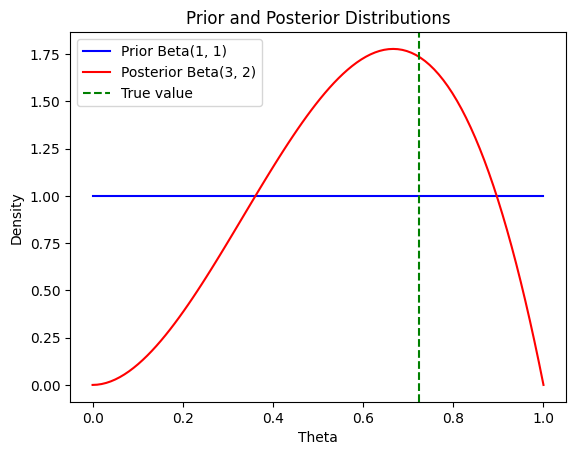

In [17]:
# We ask for the parameters of the prior beta distribution
a_prior = int(input("Enter the 'a' parameter of the prior Beta distribution: "))
b_prior = int(input("Enter the 'b' parameter of the prior Beta distribution: "))
#print'em
print(f"Using Beta({a_prior}, {b_prior}) as prior distribution.")

# We ask for the number of samples to take
n_samples = int(input("Enter the number of samples to take: "))
# We will store the results in an array
sample = [ np.random.binomial(1, random_number) for _ in range(n_samples) ]
print(f"Sampled data: {sample}")

# Now we compute the posterior parameters
a_post = a_prior + np.sum(sample)
b_post = b_prior + n_samples - np.sum(sample)
print(f"Posterior distribution is Beta({a_post}, {b_post})")

# Then we graph the prior and posterior distributions
import matplotlib.pyplot as plt
theta = np.linspace(0, 1, 100)
prior = beta_distribution(theta, a_prior, b_prior)
posterior = beta_distribution(theta, a_post, b_post)
plt.plot(theta, prior, label=f'Prior Beta({a_prior}, {b_prior})', color='blue')
plt.plot(theta, posterior, label=f'Posterior Beta({a_post}, {b_post})', color='red')
plt.axvline(random_number, color='green', linestyle='--', label='True value')
plt.title('Prior and Posterior Distributions')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.legend()
